In [45]:
import numpy as np
import random
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statistics import mean

In [46]:
def Insertion_Sort(Arr):
    Array=Arr.copy()
    for j in range(1,len(Array)):
        key = Array[j]
        i = j-1
        while i>=0 and Array[i] > key:
            Array[i+1] = Array[i]
            i -=1
        Array[i+1] = key
    return Array

In [47]:
def Merge_Sort(Array,low,high):
    if(high>low):
        mid=(high+low)//2
        Merge_Sort(Array, low, mid) 
        Merge_Sort(Array, mid+1, high) 
        Merge(Array, low, mid, high) 
    return Array  
def Merge(Array,low,mid,high):
    len1 = mid - low + 1
    len2 = high - mid
    L =   [None]*(len1) 
    R =   [None]*(len2)
    for i in range(len1): 
        L[i] = Array[low + i] 
    for j in range(len2): 
        R[j] = Array[mid + 1 + j] 
    i = 0     
    j = 0      
    final = low     # index of merged array 
    while i < len1 and j < len2 : 
        if L[i] <= R[j]: 
            Array[final] = L[i] 
            i += 1
        else: 
            Array[final] = R[j] 
            j += 1
        final += 1
    # Copy the remaining elements if any 
    while i < len1: 
        Array[final] = L[i] 
        final += 1
        i += 1
    # Copy the remaining elements if any
    while j < len2: 
        Array[final] = R[j] 
        final += 1
        j += 1

In [48]:
def Quick_Sort(Array,low,high):
    if len(Array) ==1:
        return Array
    if high > low:
        r=Partition(Array,low,high)
        Quick_Sort(Array, low, r-1) 
        Quick_Sort(Array, r+1, high) 
    return Array 
def Partition(Array,low,high):
    pivot = Array[low]
    i=low-1
    for j in range(low,high+1):
        if Array[j] <= pivot:
            i += 1
            Array[i],Array[j]=Array[j],Array[i]
    Array[low],Array[i]=Array[i],Array[low]
    return i

In [49]:
def Randomized_Quick_Sort(Array,low,high):
    if len(Array) ==1:
        return
    if high > low:
        r=RandomPartition(Array,low,high)
        Quick_Sort(Array, low, r-1) 
        Quick_Sort(Array, r+1, high) 
    return Array
def RandomPartition(Array,low,high):
    i=random.randint(low,high)
    Array[i],Array[low]= Array[low],Array[i]
    return Partition(Array,low,high)

In [50]:
def Hybird_Randomized_Quick_Sort(Array,low,high):
    if len(Array) <=31:
        return Insertion_Sort(Array)
    if len(Array) > 31:
        r=RandomPartition(Array,low,high)
        Quick_Sort(Array, low, r-1) 
        Quick_Sort(Array, r+1, high) 
    return Array
def RandomPartition(Array,low,high):
    i=random.randint(low,high)
    Array[i],Array[low]= Array[low],Array[i]
    return Partition(Array,low,high)

In [51]:
def Heap_Sort(Arr):
    Array = Arr.copy()
    size = len(Array)
    Build_Max_Heap(Array)
    for i in range(size-1,0,-1):
        Array[0],Array[i] = Array[i],Array[0]
        Max_Heapify(Array,0,i)
    return Array
def Build_Max_Heap(Array):
    size = len(Array)
    for i in range((size//2)-1,-1,-1):
        Max_Heapify(Array,i,size)
def Max_Heapify(Array,i,n):
    size = len(Array)
    l= 2*i+1
    r= 2*i+2
    if l<n and Array[l]>Array[i]:
        largest = l 
    else: largest = i
    if r<n and Array[r]>Array[largest]:
        largest = r 
    if largest != i:
        Array[i],Array[largest]=Array[largest],Array[i]
        Max_Heapify(Array,largest,n)

In [52]:
Insertion_Sort_Time =[]
Merge_Sort_Time =[]
Quick_Sort_Time =[]
Randomized_Sort_Time=[]
Hybird_Sort_Time =[]
Heap_Sort_Time=[]
def allSorts(x):
#     print(x)
    start_time = timer()
#     print("Insertion Sort",Insertion_Sort(x))
    Insertion_Sort(x)
    Insertion_Sort_Time.append(timer() - start_time)
    y = x.copy()
#     print(">>>>>",y)
    start_time = timer()
#     print("Merge Sort:",Merge_Sort(y,0,len(x)-1))
    Merge_Sort(y,0,len(x)-1)
    Merge_Sort_Time.append(timer() - start_time)
    y = x.copy()
    start_time = timer()
#     print("Quick Sort",Quick_Sort(y,0,len(x)-1))
    Quick_Sort(y,0,len(x)-1)
    Quick_Sort_Time.append(timer() - start_time)
    y = x.copy()
    start_time = timer()
#     print("Randomized Quick Sort",Randomized_Quick_Sort(y,0,len(x)-1))
    Randomized_Quick_Sort(y,0,len(x)-1)
    Randomized_Sort_Time.append(timer() - start_time)
    y = x.copy()
    start_time = timer()
#     print("Hybird Quick Sort",Hybird_Randomized_Quick_Sort(y,0,len(x)-1))
    Hybird_Randomized_Quick_Sort(y,0,len(x)-1)
    Hybird_Sort_Time.append (timer() - start_time)
    start_time = timer()
#     print("Heap Sort:",Heap_Sort(x))
    Heap_Sort(x)
    Heap_Sort_Time.append (timer() - start_time)

In [62]:
def plot(Insertion_Sort_Time,Merge_Sort_Time,Quick_Sort_Time,Randomized_Sort_Time,Hybird_Sort_Time,Heap_Sort_Time):
    xValues=[]
    [xValues.insert(i,i*(stepSize)) for i in range(1,len(Insertion_Sort_Time)+1,1)]
    fig= plt.figure(figsize=(15,8))
    plt.xlabel('Array Size')
    plt.ylabel('Run Time')
    plt.style.use('fivethirtyeight')
    plt.plot(xValues, Insertion_Sort_Time,label='Insertion Sort')
    plt.plot(xValues, Merge_Sort_Time,label='Merge Sort')
    plt.plot(xValues, Quick_Sort_Time,label='Quick Sort')
    plt.plot(xValues, Randomized_Sort_Time,label='Randomized Sort')
    plt.plot(xValues, Hybird_Sort_Time,label='Hybird Sort')
    plt.plot(xValues, Heap_Sort_Time,label='Heap Sort')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [63]:
def startTheAlgo(epochs,arrayRange,stepSize,mode):
    for i in range(100,epochs,stepSize):
#         numbers  = random.sample(range(arrayRange), i)
#             print(mode)
        numbers  = random.sample(range(arrayRange), i)
        if mode == "sorted":
            numbers.sort()
            allSorts(numbers)
        if mode == "random input":
            allSorts(numbers)  
        if mode == "partially sorted":
            start =0
            end = int((len(numbers)*0.5))
            numbers[start:end] = sorted(numbers[start:end])#partially sort the array before sending
            allSorts(numbers)
        if mode == "reverse sorted":
            numbers.sort()
            numbers.reverse()
            allSorts(numbers)

In [64]:
def emptytimestamps():
    Insertion_Sort_Time.clear()
    Merge_Sort_Time.clear()
    Quick_Sort_Time.clear()
    Randomized_Sort_Time.clear()
    Hybird_Sort_Time.clear()
    Heap_Sort_Time.clear()

In [65]:
maxArraySize = 1000 #for graphs we use it As max array size, for tables we use it as epochs
stepSize=100
arrayRange=1200
mode="random input" #random input, sorted, partially sorted, reversed 
emptytimestamps()
startTheAlgo(maxArraySize,arrayRange,stepSize,mode)

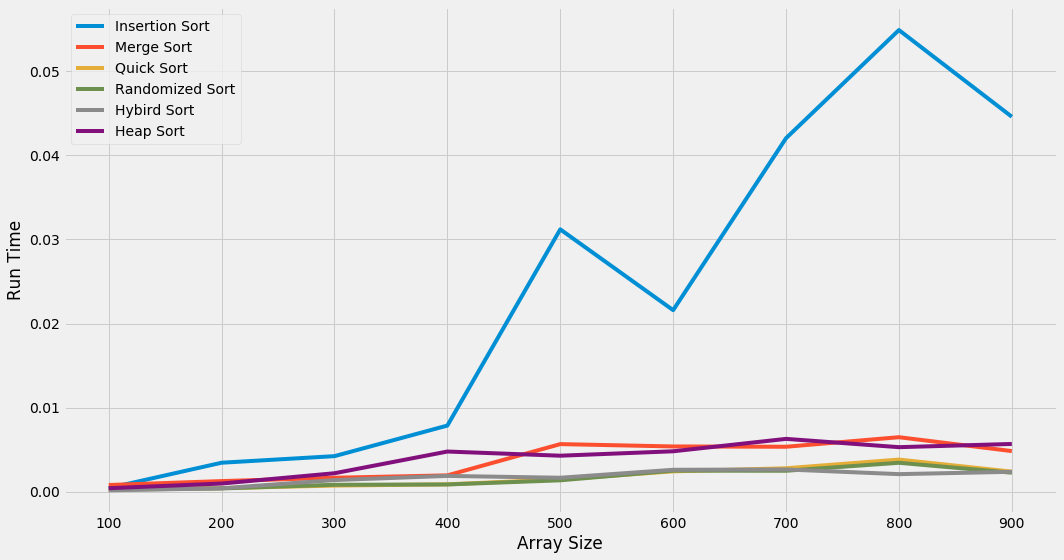

In [70]:
plot(Insertion_Sort_Time,Merge_Sort_Time,Quick_Sort_Time,Randomized_Sort_Time,Hybird_Sort_Time,Heap_Sort_Time)

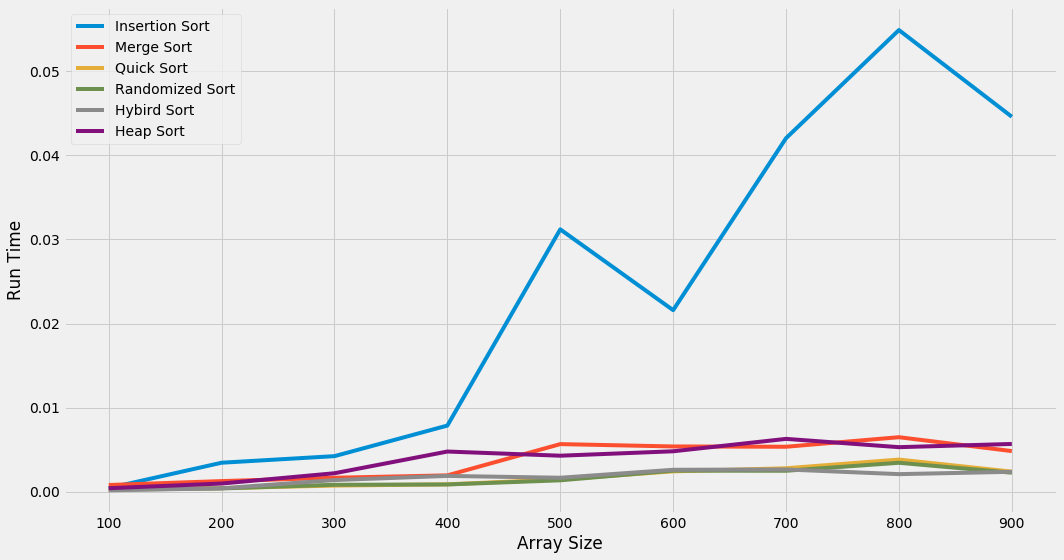

Average of Insertion Sort Run Time is 0.023366599990468886
Average of Merge Sort Run Time is 0.003713855571630928
Average of Quick Sort Run Time is 0.0016980888968747524
Average of Randomized Sort Run Time is 0.0016040778072136971
Average of Hybird Sort Run Time is 0.0016964000339309375
Average of Heap Sort Run Time is 0.003862733305949304
Min time is = 0.0016040778072136971


In [68]:
plot(Insertion_Sort_Time,Merge_Sort_Time,Quick_Sort_Time,Randomized_Sort_Time,Hybird_Sort_Time,Heap_Sort_Time)

print ("Average of Insertion Sort Run Time is", mean(Insertion_Sort_Time))
print ("Average of Merge Sort Run Time is", mean(Merge_Sort_Time))
print ("Average of Quick Sort Run Time is", mean(Quick_Sort_Time))
print ("Average of Randomized Sort Run Time is", mean(Randomized_Sort_Time))
print ("Average of Hybird Sort Run Time is", mean(Hybird_Sort_Time))
print ("Average of Heap Sort Run Time is", mean(Heap_Sort_Time))
min_time = min(mean(Insertion_Sort_Time),mean(Merge_Sort_Time),mean(Quick_Sort_Time),mean(Randomized_Sort_Time),mean(Hybird_Sort_Time),mean(Heap_Sort_Time))
print("Min time is =",min_time)